PREDICTING MACHINE FAILURE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv("machine failure.csv")
data.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
data = data.drop(columns=['Product ID','UDI'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Type'] = label_encoder.fit_transform(data['Type'])


In [ ]:
data.head(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
data['Temperature Difference [K]'] = data['Process temperature [K]'] - data['Air temperature [K]']
data['Torque per RPM'] = data['Torque [Nm]'] / data['Rotational speed [rpm]']
data['Rolling mean Rotational speed'] = data['Rotational speed [rpm]'].rolling(window=3).mean()
data.head(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Temperature Difference [K],Torque per RPM,Rolling mean Rotational speed
0,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,0.027595,NaN
1,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,0.032884,NaN
2,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,0.032977,1485.666667
3,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,0.027565,1446.333333
4,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,0.028409,1446.333333
5,2,298.1,308.6,1425,41.9,11,0,0,0,0,0,0,10.5,0.029404,1422.000000
6,1,298.1,308.6,1558,42.4,14,0,0,0,0,0,0,10.5,0.027214,1463.666667
7,1,298.1,308.6,1527,40.2,16,0,0,0,0,0,0,10.5,0.026326,1503.333333
8,2,298.3,308.7,1667,28.6,18,0,0,0,0,0,0,10.4,0.017157,1584.000000
9,2,298.5,309.0,1741,28.0,21,0,0,0,0,0,0,10.5,0.016083,1645.000000


In [ ]:
first_valid_value = data['Rolling mean Rotational speed'].dropna().iloc[0]
data['Rolling mean Rotational speed'].fillna(first_valid_value, inplace=True)
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Temperature Difference [K],Torque per RPM,Rolling mean Rotational speed
0,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,0.027595,1485.666667
1,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,0.032884,1485.666667
2,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,0.032977,1485.666667
3,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,0.027565,1446.333333
4,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,0.028409,1446.333333


In [ ]:
from scipy.stats import skew,yeojohnson
numeric_cols = ['Air temperature [K]',
      'Temperature Difference [K]',
      'Rolling mean Rotational speed',
      'Process temperature [K]',
      'Torque per RPM',
      'Rotational speed [rpm]',
      'Torque [Nm]',
      'Tool wear [min]']
skewness = data[numeric_cols].apply(lambda x: skew(x.dropna()))
skewness_df = pd.DataFrame({'Feature': numeric_cols, 'Skewness': skewness})
skewness_df.head(10)

,Feature,Skewness
Air temperature [K],Air temperature [K],0.114257
Temperature Difference [K],Temperature Difference [K],-0.072473
Rolling mean Rotational speed,Rolling mean Rotational speed,1.097711
Process temperature [K],Process temperature [K],0.015025
Torque per RPM,Torque per RPM,0.165923
Rotational speed [rpm],Rotational speed [rpm],1.992872
Torque [Nm],Torque [Nm],-0.009515
Tool wear [min],Tool wear [min],0.027288


In [ ]:
for idx, row in skewness_df.iterrows():
    col = row['Feature']
    skew = row['Skewness']
    if skew > 1:
        # Apply cube root transformation
        data[col] = np.cbrt(data[col])
    elif -1 <= skew < 0:
        # Apply log transformation
        data[col] = np.log1p(data[col])

In [ ]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Temperature Difference [K],Torque per RPM,Rolling mean Rotational speed
0,2,298.1,308.6,11.575434,3.779634,0,0,0,0,0,0,0,2.442347,0.027595,11.410564
1,1,298.2,308.7,11.208157,3.856510,3,0,0,0,0,0,0,2.442347,0.032884,11.410564
2,1,298.1,308.5,11.442053,3.919991,5,0,0,0,0,0,0,2.433613,0.032977,11.410564
3,1,298.2,308.6,11.274105,3.701302,7,0,0,0,0,0,0,2.433613,0.027565,11.308963
4,1,298.2,308.7,11.208157,3.713572,9,0,0,0,0,0,0,2.442347,0.028409,11.308963


In [ ]:

scaler = StandardScaler()

data[['Air temperature [K]',
      'Temperature Difference [K]',
      'Process temperature [K]',
      'Torque per RPM',
      'Rotational speed [rpm]',
      'Torque [Nm]',
      'Tool wear [min]']] = scaler.fit_transform(data[['Air temperature [K]',
                                   'Temperature Difference [K]',
                                   'Process temperature [K]',
                                   'Torque per RPM',
                                   'Rotational speed [rpm]',
                                   'Torque [Nm]',
                                    'Tool wear [min]']])


In [ ]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Temperature Difference [K],Torque per RPM,Rolling mean Rotational speed
0,2,-0.952389,-0.947360,0.109365,0.371779,-1.695984,0,0,0,0,0,0,0.528532,0.079191,11.410564
1,1,-0.902393,-0.879959,-0.758050,0.659450,-1.648852,0,0,0,0,0,0,0.528532,0.677574,11.410564
2,1,-0.952389,-1.014761,-0.205648,0.896995,-1.617430,0,0,0,0,0,0,0.433531,0.688185,11.410564
3,1,-0.902393,-0.947360,-0.602299,0.078662,-1.586009,0,0,0,0,0,0,0.433531,0.075735,11.308963
4,1,-0.902393,-0.879959,-0.758050,0.124577,-1.554588,0,0,0,0,0,0,0.528532,0.171294,11.308963


<Axes: >

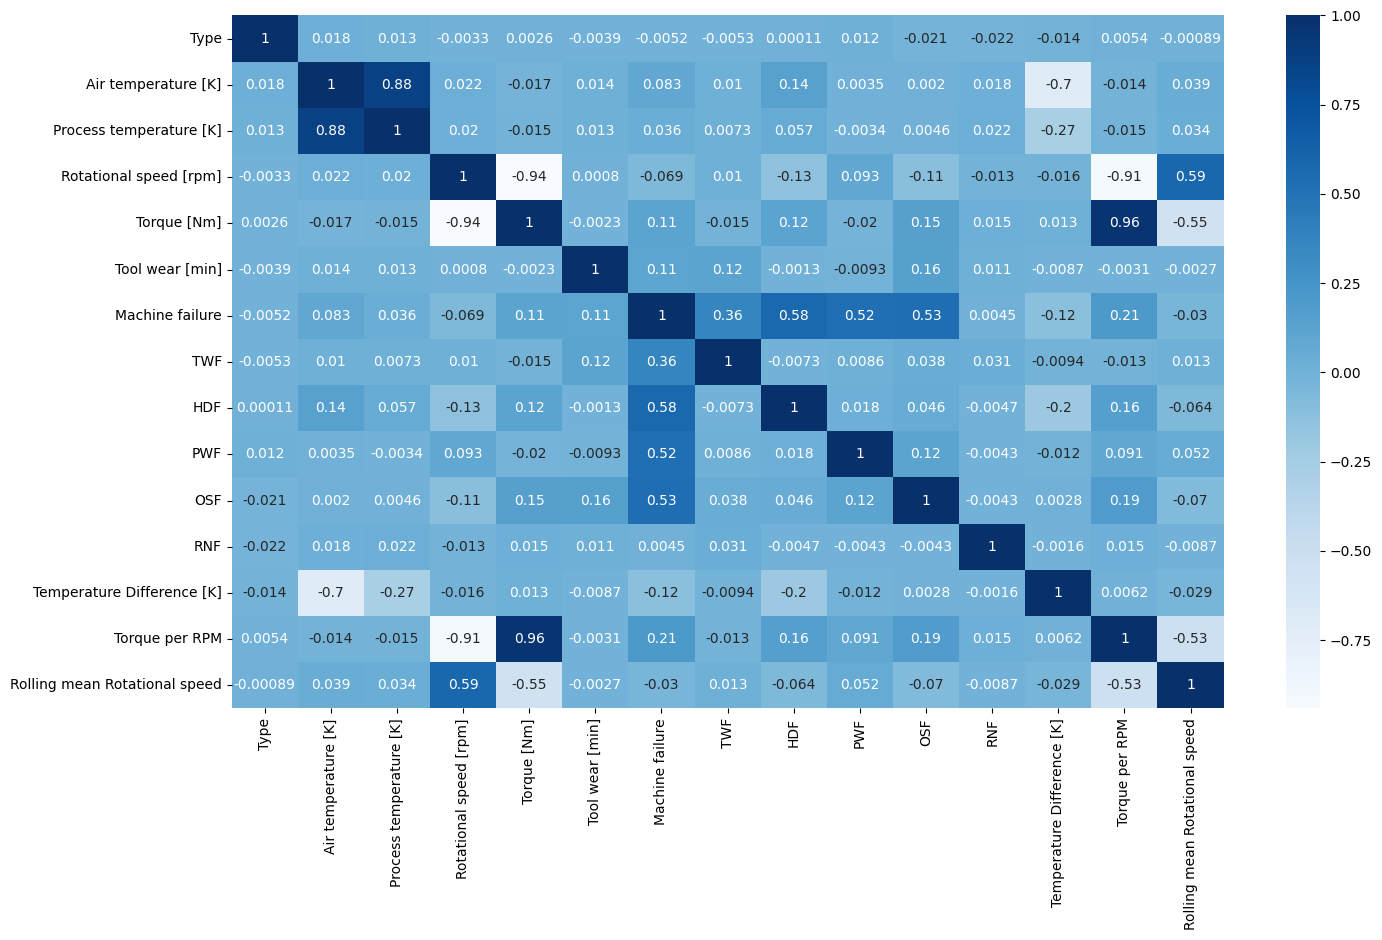

In [ ]:
corr = data.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True,cmap='Blues')

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

X = data.drop('Machine failure', axis=1)
y = data['Machine failure']
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)
selected_features = selector.get_support(indices=True)
selected_features_df = pd.DataFrame(X_selected, columns=selected_features)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))



Fitting 3 folds for each of 216 candidates, totalling 648 fits
Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000

